In [1]:
from lib.MLP import *
from lib.graph import draw_dot
from lib.graph import draw_mlp

In [ ]:



#fitur, 3 input, 4 iterasi
xs = [
    [2.0,3.0,-1],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0]
]


#label
ys = [
    [1.0, -1.0],
    [-1.0, 1.0,],
    [-1.0, 1.0],
    [1.0, -1.0]
]  #s



input_layer = 3
layer_f_activations = [
  [3,'linear'],#hidden layer 1
  [3,'relu'], #hidden layer 2
  [3,'tanh'], #hidden layer 3
  [2,'tanh'] #output layer
]
weight = Weight("uniform", 42, input_layer, lower=-1, upper=1)

n = MLP(input_layer,[n[0] for n in layer_f_activations],activations=[n[1] for n in layer_f_activations],weight=weight)
for i in range(200): #50 epoch


  #Forward
  ypred = [n(x) for x in xs]
  #Sum rumus MSE
  #Todo, Loss function yg lain
  loss = sum([sum((yout_i - ygt_i)**2 for ygt_i, yout_i in zip(ygt, yout)) for ygt, yout in zip(ys, ypred)])

  #flush bobot w
  n.zero_grad()

  ##Backward
  loss.backward()
  learning_rate =0.01


  #gradient descent
  for p in n.parameters():
    #W + -lr*deltaW
    p.data += -1 *learning_rate * p.grad
  if(i%10==0):
    print(i,"Lost Func (MSE) " ,loss.data)

for x in ypred:
  print(x)



sz:  [3, 2, 3, 3, 2]
0 Lost Func (MSE)  6.261877076827576
10 Lost Func (MSE)  3.994041952833955
20 Lost Func (MSE)  1.1628934145773913
30 Lost Func (MSE)  0.5204917833887678
40 Lost Func (MSE)  0.30386598345663485
50 Lost Func (MSE)  0.20590088813111482
60 Lost Func (MSE)  0.1509977828121623
70 Lost Func (MSE)  0.1187776343228055
80 Lost Func (MSE)  0.09731119239031494
90 Lost Func (MSE)  0.08156230949272557
100 Lost Func (MSE)  0.07016931974993175
110 Lost Func (MSE)  0.06144380822059818
120 Lost Func (MSE)  0.05468530596291347
130 Lost Func (MSE)  0.04903110845925186
140 Lost Func (MSE)  0.044467340671200326
150 Lost Func (MSE)  0.04072318796979702
160 Lost Func (MSE)  0.03747773734606302
170 Lost Func (MSE)  0.03469933699143198
180 Lost Func (MSE)  0.03233552722349509
190 Lost Func (MSE)  0.03019472344980389
[Value(data=0.9802079681807586, grad=-0.03958406363848277), Value(data=-0.9775108188579682, grad=0.0449783622840636)]
[Value(data=-0.9799398238711848, grad=0.04012035225763033),

In [4]:
n.layers

[Layer of [LinearNeuron(3), LinearNeuron(3)],
 Layer of [ReluNeuron(3), ReluNeuron(3), ReluNeuron(3)],
 Layer of [TanhNeuron(3), TanhNeuron(3), TanhNeuron(3)],
 Layer of [TanhNeuron(3), TanhNeuron(3)]]

In [4]:
n.inputlayer

3

Layer of [LinearNeuron(3), LinearNeuron(3)]
Layer of [ReluNeuron(3), ReluNeuron(3), ReluNeuron(3)]
Layer of [TanhNeuron(3), TanhNeuron(3), TanhNeuron(3)]
Layer of [TanhNeuron(3), TanhNeuron(3)]


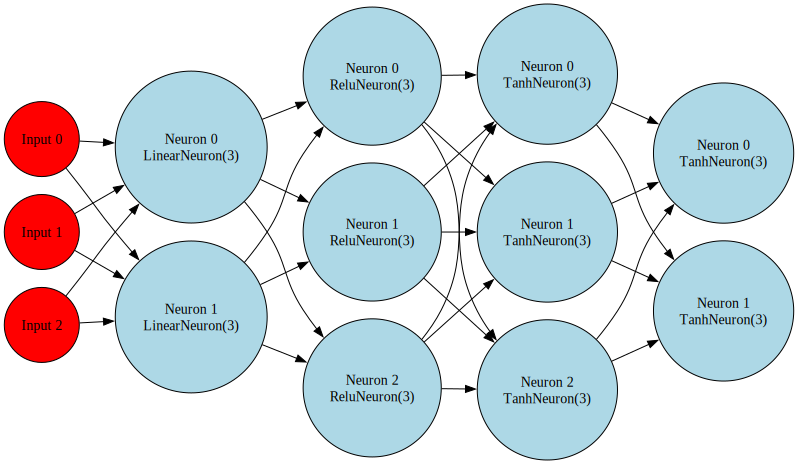

In [3]:
draw_mlp(n)

In [56]:
draw_dot(loss).render("graph_output.dot",view = True)

'graph_output.dot.svg'

In [55]:
draw_mlp(n).render("mlp.dot",view= True)


'mlp.dot.svg'